In [96]:
from market_data import MarketData
import pandas as pd
from SV_model import SVModel
from visualization import *
import matplotlib.pyplot as plt

def activeOptions(ticker, option_volume_threshold):
    min_strike =  min(ticker.calls[ticker.calls['volume'] > option_volume_threshold]['strike'].min(), ticker.puts[ticker.puts['volume'] > option_volume_threshold]['strike'].min())
    max_strike = max(ticker.calls[ticker.calls['volume'] > option_volume_threshold]['strike'].max(), ticker.puts[ticker.puts['volume'] > option_volume_threshold]['strike'].max())

    puts = ticker.puts[(ticker.puts['strike'] >= min_strike) & (ticker.puts['strike'] <= max_strike)]
    calls = ticker.calls[(ticker.calls['strike'] >= min_strike) & (ticker.calls['strike'] <= max_strike)]

    return [puts, calls]

expiryfar = '2025-10-17'
expiryclose = '2025-08-29'

ticker = "NVDA"
nvda = MarketData(ticker)
output_directory = "market_data_exports"
nvda.export_all_data_to_csv(output_dir=output_directory)
ticker = "AAPL"
aapl = MarketData(ticker)
output_directory = "market_data_exports"
aapl.export_all_data_to_csv(output_dir=output_directory)

nvdafar = SVModel("NVDA", expiryfar)
nvdaclose = SVModel("NVDA", expiryclose)
aaplfar = SVModel("AAPL", expiryfar)
aaplclose = SVModel("AAPL", expiryclose)

Calibrated SABR Parameters: alpha=1.0000, beta=0.8167, rho=-0.6591, nu=1.5000
Calibrated SABR Parameters: alpha=1.0000, beta=0.8486, rho=-0.9900, nu=1.5000
Calibrated SABR Parameters: alpha=0.2680, beta=0.9900, rho=0.1677, nu=1.5000
Calibrated SABR Parameters: alpha=1.0000, beta=0.7658, rho=-0.3143, nu=1.5000


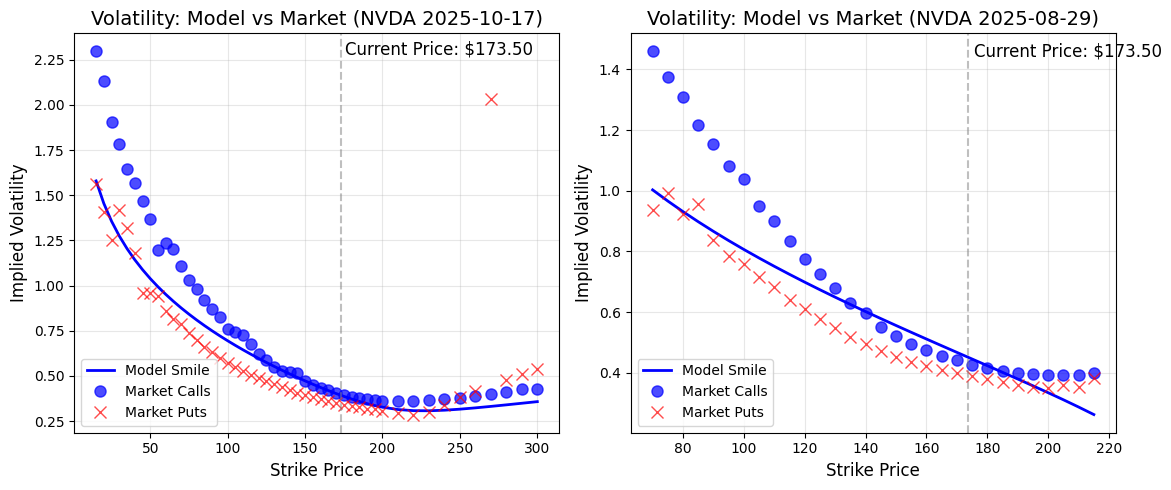

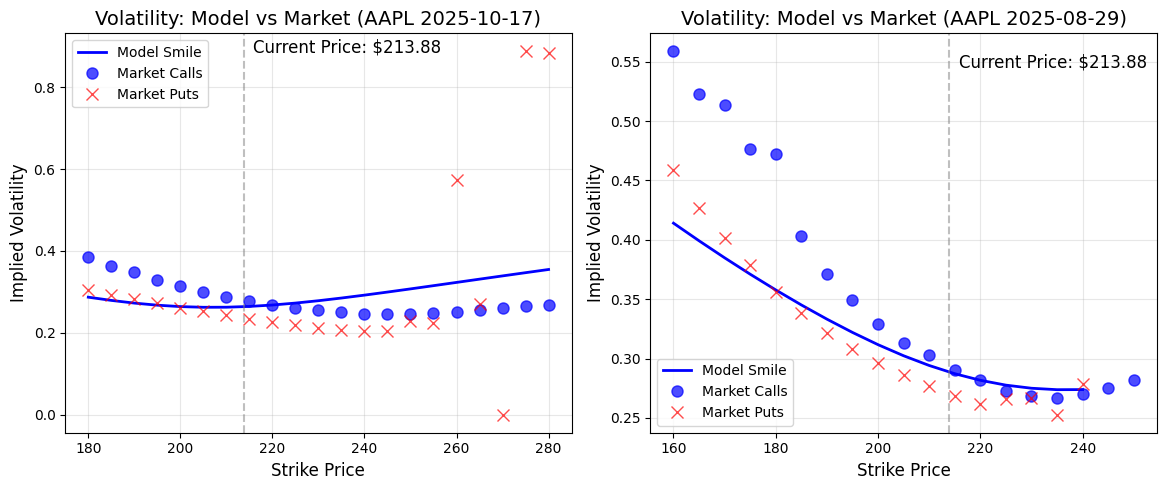

In [105]:
volume_threshold = 500
nvda_far_options = activeOptions(nvdafar, volume_threshold)
nvda_far_puts = nvda_far_options[0]
nvda_far_calls = nvda_far_options[1]

nvda_close_options = activeOptions(nvdaclose, volume_threshold)
nvda_close_puts = nvda_close_options[0]
nvda_close_calls = nvda_close_options[1]


volume_threshold = 100
aapl_far_options = activeOptions(aaplfar, volume_threshold)
aapl_far_puts = aapl_far_options[0]
aapl_far_calls = aapl_far_options[1]

aapl_close_options = activeOptions(aaplclose, volume_threshold)
aapl_close_puts = aapl_close_options[0]
aapl_close_calls = aapl_close_options[1]

# Create scatter plots
plt.figure(figsize=(12, 5))

# far expiration
plt.subplot(1, 2, 1)
# Plot model volatility smiles
nvdafar.IVs = nvdafar.IVs[nvdafar.IVs['Strike']>=nvda_far_puts['strike'].min()]
nvdafar.IVs =  nvdafar.IVs[nvdafar.IVs['Strike'] <=nvda_far_puts['strike'].max()]

plt.plot(nvdafar.IVs['Strike'], nvdafar.IVs['ImpliedVolatility'], 
         'b-', linewidth=2, label='Model Smile')

# Plot market IVs
plt.plot(nvda_far_calls['strike'], nvda_far_calls['impliedVolatility'], 
         'bo', markersize=8, alpha=0.7, label='Market Calls')
plt.plot(nvda_far_puts['strike'], nvda_far_puts['impliedVolatility'], 
         'rx', markersize=8, alpha=0.7, label='Market Puts')

# Add reference line at current stock price
plt.axvline(x=nvda.underlying_price, color='gray', linestyle='--', alpha=0.5)
plt.text(nvda.underlying_price+2, plt.ylim()[1]*0.95, 
         f'Current Price: ${nvda.underlying_price:.2f}', fontsize=12)
# Format plot
plt.title(f'Volatility: Model vs Market ({nvda.ticker} {expiryfar})', fontsize=14)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Implied Volatility', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()

nvdaclose.IVs = nvdaclose.IVs[nvdaclose.IVs['Strike']>=nvda_close_puts['strike'].min()]
nvdaclose.IVs =  nvdaclose.IVs[nvdaclose.IVs['Strike'] <=nvda_close_puts['strike'].max()]

# far expiration
plt.subplot(1, 2, 2)
# Plot model volatility smiles
plt.plot(nvdaclose.IVs['Strike'], nvdaclose.IVs['ImpliedVolatility'], 
         'b-', linewidth=2, label='Model Smile')

# Plot market IVs
plt.plot(nvda_close_calls['strike'], nvda_close_calls['impliedVolatility'], 
         'bo', markersize=8, alpha=0.7, label='Market Calls')
plt.plot(nvda_close_puts['strike'], nvda_close_puts['impliedVolatility'], 
         'rx', markersize=8, alpha=0.7, label='Market Puts')

# Add reference line at current stock price
plt.axvline(x=nvda.underlying_price, color='gray', linestyle='--', alpha=0.5)
plt.text(nvda.underlying_price+2, plt.ylim()[1]*0.95, 
         f'Current Price: ${nvda.underlying_price:.2f}', fontsize=12)
# Format plot
plt.title(f'Volatility: Model vs Market ({nvda.ticker} {expiryclose})', fontsize=14)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Implied Volatility', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()



#################################################################################################################


# Create scatter plots
plt.figure(figsize=(12, 5))
# far expiration
plt.subplot(1, 2, 1)
# Plot model volatility smiles
aaplfar.IVs = aaplfar.IVs[aaplfar.IVs['Strike']>=aapl_far_puts['strike'].min()]
aaplfar.IVs =  aaplfar.IVs[aaplfar.IVs['Strike'] <=aapl_far_puts['strike'].max()]

plt.plot(aaplfar.IVs['Strike'], aaplfar.IVs['ImpliedVolatility'], 
         'b-', linewidth=2, label='Model Smile')

# Plot market IVs
plt.plot(aapl_far_calls['strike'], aapl_far_calls['impliedVolatility'], 
         'bo', markersize=8, alpha=0.7, label='Market Calls')
plt.plot(aapl_far_puts['strike'], aapl_far_puts['impliedVolatility'], 
         'rx', markersize=8, alpha=0.7, label='Market Puts')

# Add reference line at current stock price
plt.axvline(x=aapl.underlying_price, color='gray', linestyle='--', alpha=0.5)
plt.text(aapl.underlying_price+2, plt.ylim()[1]*0.95, 
         f'Current Price: ${aapl.underlying_price:.2f}', fontsize=12)
# Format plot
plt.title(f'Volatility: Model vs Market ({aapl.ticker} {expiryfar})', fontsize=14)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Implied Volatility', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()

aaplclose.IVs = aaplclose.IVs[aaplclose.IVs['Strike']>=aapl_close_puts['strike'].min()]
aaplclose.IVs =  aaplclose.IVs[aaplclose.IVs['Strike'] <=aapl_close_puts['strike'].max()]

# far expiration
plt.subplot(1, 2, 2)
# Plot model volatility smiles
plt.plot(aaplclose.IVs['Strike'], aaplclose.IVs['ImpliedVolatility'], 
         'b-', linewidth=2, label='Model Smile')

# Plot market IVs
plt.plot(aapl_close_calls['strike'], aapl_close_calls['impliedVolatility'], 
         'bo', markersize=8, alpha=0.7, label='Market Calls')
plt.plot(aapl_close_puts['strike'], aapl_close_puts['impliedVolatility'], 
         'rx', markersize=8, alpha=0.7, label='Market Puts')

# Add reference line at current stock price
plt.axvline(x=aapl.underlying_price, color='gray', linestyle='--', alpha=0.5)
plt.text(aapl.underlying_price+2, plt.ylim()[1]*0.95, 
         f'Current Price: ${aapl.underlying_price:.2f}', fontsize=12)
# Format plot
plt.title(f'Volatility: Model vs Market ({aapl.ticker} {expiryclose})', fontsize=14)
plt.xlabel('Strike Price', fontsize=12)
plt.ylabel('Implied Volatility', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()





plt.tight_layout()
plt.show()